# Amazon (AMZN) Stock Price prediction using Facebook Prophet

In [1]:
## Switch to GPU mode for faster Computation (Runtime> Change runtime> GPU)

## Importing all the necessary Libraries

In [2]:
#Necessary libraries = Pandas, fbprophet and plotly

#pandas= data Manipulation and analysis
#fbprophet = Forecasting
#plotly= data visualization



In [3]:
import pandas as pd
import plotly.express as px
import prophet


In [4]:
#Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [5]:
df = pd.read_csv("AMZN.csv")

In [6]:
#read_csv function from pandas

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-28,121.570000,122.839996,118.080002,122.279999,122.279999,82245500
1,2022-07-29,134.899994,137.649994,132.410004,134.949997,134.949997,148892900
2,2022-08-01,134.960007,138.830002,133.509995,135.389999,135.389999,76846900
3,2022-08-02,134.720001,137.440002,134.089996,134.160004,134.160004,61922400
4,2022-08-03,136.210007,140.490005,136.050003,139.520004,139.520004,71827800
...,...,...,...,...,...,...,...
247,2023-07-24,130.309998,131.660004,128.350006,128.800003,128.800003,45591100
248,2023-07-25,129.309998,129.580002,128.529999,129.130005,129.130005,39236700
249,2023-07-26,126.510002,129.080002,126.110001,128.149994,128.149994,53910100
250,2023-07-27,131.000000,132.630005,127.790001,128.250000,128.250000,52610700


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,110.253492,111.911508,108.573572,110.246191,110.246191,6.670337e+07
std,16.551662,16.698899,16.530924,16.575446,16.575446,2.617689e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,2.826480e+07
25%,96.077501,97.642498,94.232499,96.289999,96.289999,5.087268e+07
50%,105.370002,107.470001,104.514999,105.745003,105.745003,5.950685e+07
75%,125.729999,127.472502,124.365000,126.314999,126.314999,7.289412e+07
max,143.910004,146.570007,142.000000,144.779999,144.779999,2.231334e+08


# Data Visualization using plotly express- Visualizing the historical performance of Amazon

In [10]:
#Line graph, Area graph , box plot (Analyzing price and volume)

In [11]:
px.area(df, x="Date", y="Close")

In [12]:
px.line(df, x="Date", y="Close")

In [13]:
px.area(df, x="Date", y="Volume")

In [14]:
px.bar(df,  y="Volume")

In [15]:
px.box(df,  y="Close")

# Understanding Facebook Prophet

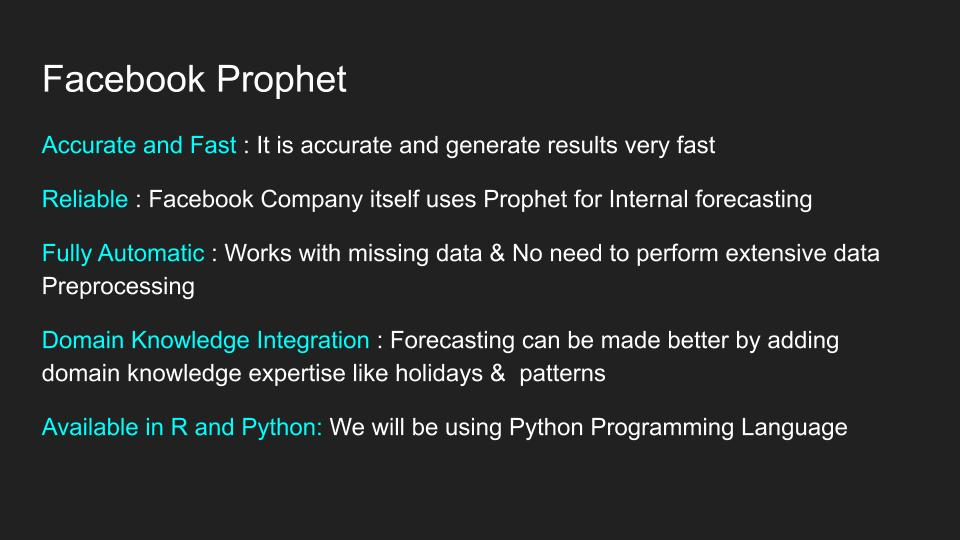

## Data Preperation

In [16]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-28,121.570000,122.839996,118.080002,122.279999,122.279999,82245500
1,2022-07-29,134.899994,137.649994,132.410004,134.949997,134.949997,148892900
2,2022-08-01,134.960007,138.830002,133.509995,135.389999,135.389999,76846900
3,2022-08-02,134.720001,137.440002,134.089996,134.160004,134.160004,61922400
4,2022-08-03,136.210007,140.490005,136.050003,139.520004,139.520004,71827800
...,...,...,...,...,...,...,...
247,2023-07-24,130.309998,131.660004,128.350006,128.800003,128.800003,45591100
248,2023-07-25,129.309998,129.580002,128.529999,129.130005,129.130005,39236700
249,2023-07-26,126.510002,129.080002,126.110001,128.149994,128.149994,53910100
250,2023-07-27,131.000000,132.630005,127.790001,128.250000,128.250000,52610700


In [17]:
columns=['Date', 'Close']
ndf=pd.DataFrame(df, columns=columns)

In [18]:
ndf

,Date,Close
0,2022-07-28,122.279999
1,2022-07-29,134.949997
2,2022-08-01,135.389999
3,2022-08-02,134.160004
4,2022-08-03,139.520004
...,...,...
247,2023-07-24,128.800003
248,2023-07-25,129.130005
249,2023-07-26,128.149994
250,2023-07-27,128.250000


In [19]:
#fbprophet doesn't understand date and close so we will rename it as df and y.
prophet_df = ndf.rename(columns={'Date': 'ds', 'Close':'y'})

In [20]:
prophet_df

,ds,y
0,2022-07-28,122.279999
1,2022-07-29,134.949997
2,2022-08-01,135.389999
3,2022-08-02,134.160004
4,2022-08-03,139.520004
...,...,...
247,2023-07-24,128.800003
248,2023-07-25,129.130005
249,2023-07-26,128.149994
250,2023-07-27,128.250000


## Creating Facebook Prophet Model

In [21]:
from prophet import Prophet
m = Prophet()
m.fit(prophet_df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbe_znpp/el5nfmy2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsbe_znpp/fnysrnur.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17858', 'data', 'file=/tmp/tmpsbe_znpp/el5nfmy2.json', 'init=/tmp/tmpsbe_znpp/fnysrnur.json', 'output', 'file=/tmp/tmpsbe_znpp/prophet_model46o4f73g/prophet_model-20230729085301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:53:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:53:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [22]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [23]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-07-28,139.649141,137.093468,149.697596,139.649141,139.649141,3.674663,3.674663,3.674663,3.674663,3.674663,3.674663,0.0,0.0,0.0,143.323803
1,2022-07-29,139.278505,136.713644,149.229648,139.278505,139.278505,3.576480,3.576480,3.576480,3.576480,3.576480,3.576480,0.0,0.0,0.0,142.854985
2,2022-08-01,138.166600,135.574460,147.784321,138.166600,138.166600,3.523099,3.523099,3.523099,3.523099,3.523099,3.523099,0.0,0.0,0.0,141.689699
3,2022-08-02,137.795965,134.609520,147.010822,137.795965,137.795965,3.389161,3.389161,3.389161,3.389161,3.389161,3.389161,0.0,0.0,0.0,141.185126
4,2022-08-03,137.425329,134.758711,147.264243,137.425329,137.425329,3.647343,3.647343,3.647343,3.647343,3.647343,3.647343,0.0,0.0,0.0,141.072673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2023-08-23,140.080412,137.497348,150.066460,139.248654,140.930320,3.647343,3.647343,3.647343,3.647343,3.647343,3.647343,0.0,0.0,0.0,143.727755
278,2023-08-24,140.385824,137.720911,150.034229,139.496312,141.292023,3.674663,3.674663,3.674663,3.674663,3.674663,3.674663,0.0,0.0,0.0,144.060486
279,2023-08-25,140.691236,137.489176,150.761752,139.739789,141.658724,3.576480,3.576480,3.576480,3.576480,3.576480,3.576480,0.0,0.0,0.0,144.267715
280,2023-08-26,140.996648,125.590661,138.297840,139.991901,142.035015,-8.905370,-8.905370,-8.905370,-8.905370,-8.905370,-8.905370,0.0,0.0,0.0,132.091278


In [24]:
px.line(forecast, x='ds', y='yhat')

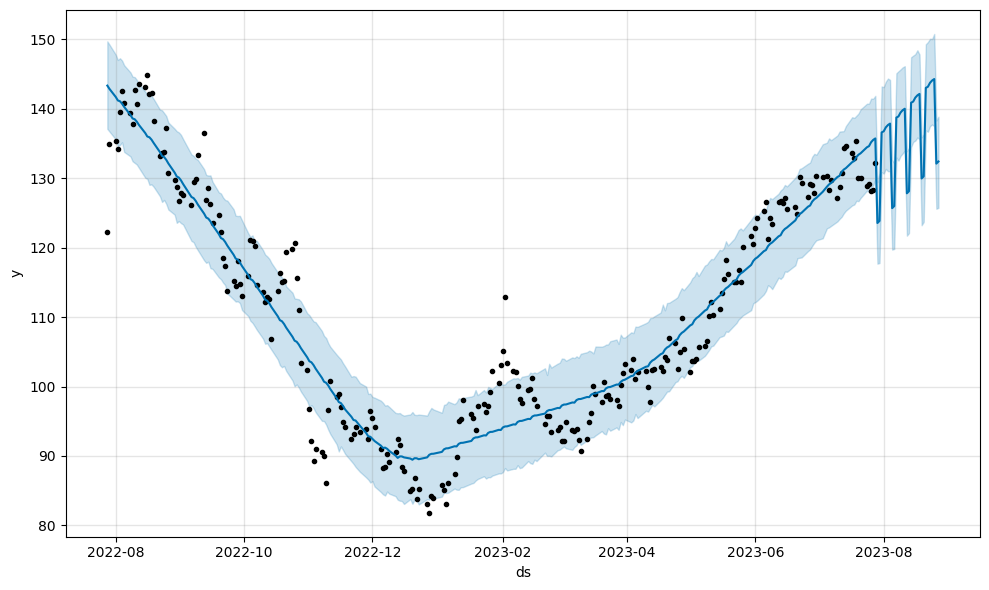

In [25]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')
#black dots that we see are actual tesla price.
#shaded blue region is between yhat_lower and yhat_upper

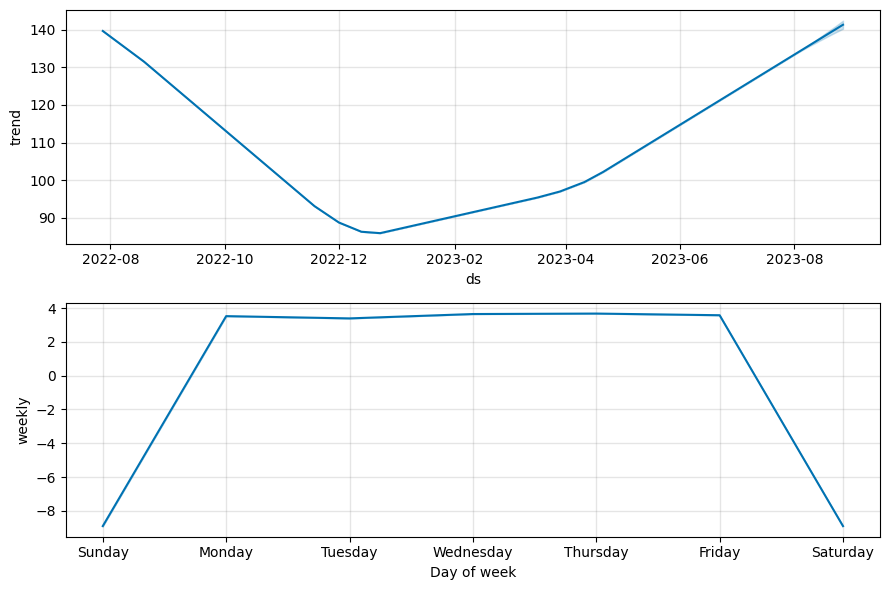

In [26]:
figure2=m.plot_components(forecast)

##Downloading the Forecast data

In [27]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>